## Analysis Social Media Data (Instgram) - Comments

## Step 1 : Analyze the sentiment of text data, such as comments and likes to determine whether the sentiment is positive, negative, or neutral.

## Instagram Comments Analysis

## Step 2 : Import Libraries and dataset

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
# Import dataset
df = pd.read_csv('comments.csv')

In [ ]:
df.head()

,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,1,unde at dolorem,2,1,13-04-2023 08:04,April 14,yes,1
1,2,quae ea ducimus,3,1,13-04-2023 08:04,April 14,no,2
2,3,alias a voluptatum,5,1,13-04-2023 08:04,April 14,no,4
3,4,facere suscipit sunt,14,1,13-04-2023 08:04,April 14,yes,2
4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,April 14,yes,1


In [ ]:
# Display information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7488 entries, 0 to 7487
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   7488 non-null   int64 
 1   comment              7488 non-null   object
 2   User  id             7488 non-null   int64 
 3   Photo id             7488 non-null   int64 
 4   created Timestamp    7488 non-null   object
 5   posted date          7488 non-null   object
 6   emoji used           7488 non-null   object
 7   Hashtags used count  7488 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 468.1+ KB


In [ ]:
df.isnull().sum()

,0
id,0
comment,0
User id,0
Photo id,0
created Timestamp,0
posted date,0
emoji used,0
Hashtags used count,0


In [ ]:
# Download stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Step 3 : Data Cleaning and Preprocessing

In [ ]:
# Define a function for cleaning text
def clean_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    # Remove stopwords and punctuation
    tokens = [word for word in tokens if word not in stopwords.words('english') and word not in string.punctuation]
    return ' '.join(tokens)

# Apply cleaning function
df['cleaned_comment'] = df['comment'].apply(clean_text)

## Step 4 : Sentiment Classification

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment
def classify_sentiment(text):
    score = sia.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'positive'
    elif score['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment classification
df['sentiment'] = df['cleaned_comment'].apply(classify_sentiment)

## Step 5 : Display Sentiment distribution of instagram comments

<ipython-input-9-5b3de6fd6ba3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


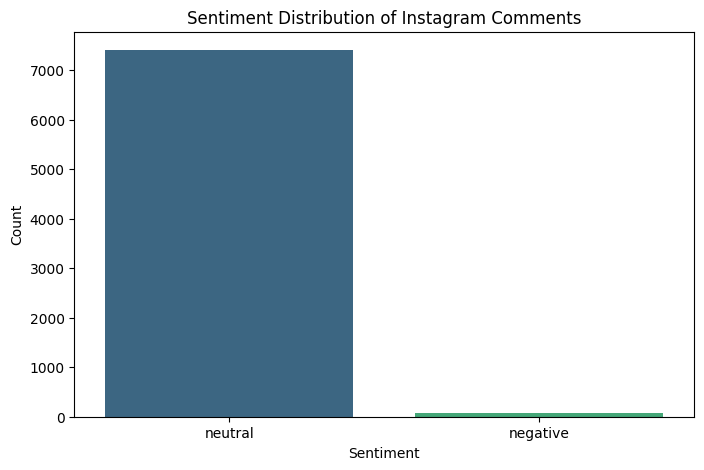

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of each sentiment type
sentiment_counts = df['sentiment'].value_counts()

# Create a bar plot for sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution of Instagram Comments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

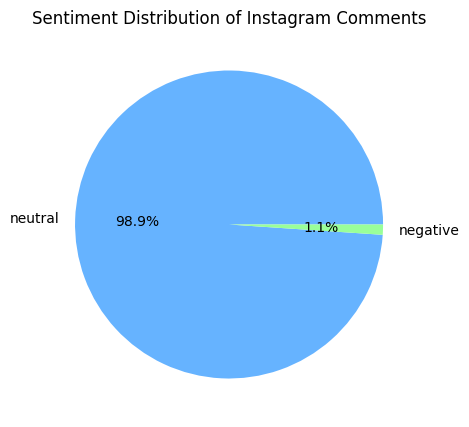

In [ ]:
sentiment_counts = df['sentiment'].value_counts()

# Create a pie chart for sentiment distribution
plt.figure(figsize=(8, 5))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Sentiment Distribution of Instagram Comments')
plt.show()

## Insights :
* Comments are neutral to positive there are very few negative comments
* 99% positive - neutral comments and 1% negative

# -------------------------------------------------------

## Analysis Social Media Data (Instgram) - Likes

## Step 1 : Analyze the sentiment of text data, such as comments and likes to determine whether the sentiment is positive, negative, or neutral.

## Instagram Likes Analysis

## Step 2 : Import Libraries and dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [ ]:
# Load data
data = pd.read_csv('likes.csv')

In [ ]:
# Display the first few rows of the dataframe
data.head()

,user,photo,created time,following or not,like type
0,2,1,13-04-2023 08:04,yes,heart emoji
1,2,4,13-04-2023 08:04,no,thumbs up
2,2,8,13-04-2023 08:04,yes,laughing
3,2,9,13-04-2023 08:04,no,fire
4,2,10,13-04-2023 08:04,yes,clap


In [ ]:
# Display information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8782 entries, 0 to 8781
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user              8782 non-null   int64 
 1   photo             8782 non-null   int64 
 2   created time      8782 non-null   object
 3   following or not  8782 non-null   object
 4   like type         8782 non-null   object
dtypes: int64(2), object(3)
memory usage: 343.2+ KB


In [ ]:
data.isnull().sum()

,0
user,0
photo,0
created time,0
following or not,0
like type,0


## Step 3 : Data Cleaning and Preprocessing

In [ ]:
# Extract unique like types
unique_likes = data['like type'].unique()

In [ ]:
# Remove duplicates
data = data.drop_duplicates(subset=['like type'])

In [ ]:
# Display cleaned unique likes
print(unique_likes)

['heart emoji' 'thumbs up' 'laughing' 'fire' 'clap' 'single tap'
 'double tap']


## Step 4 : Sentiment Classification

### Using VADER for Sentiment Analysis:

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Create a mapping of like types to sentiments
like_sentiment_mapping = {
    'heart emoji': 'positive',
    'thumbs up': 'positive',
    'laughing': 'positive',
    'fire': 'positive',
    'clap': 'positive',
    'single tap': 'neutral',
    'double tap': 'neutral'
}

# Function to classify sentiment based on like type
def classify_sentiment(like_type):
    return like_sentiment_mapping.get(like_type, 'neutral')

# Apply sentiment classification
data['sentiment'] = data['like type'].apply(classify_sentiment)

<ipython-input-19-b1fd59a9f1b5>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentiment'] = data['like type'].apply(classify_sentiment)


## Step 5 : Visualization - Display Sentiment distribution of instagram Likes

<ipython-input-20-6b05e9618e58>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


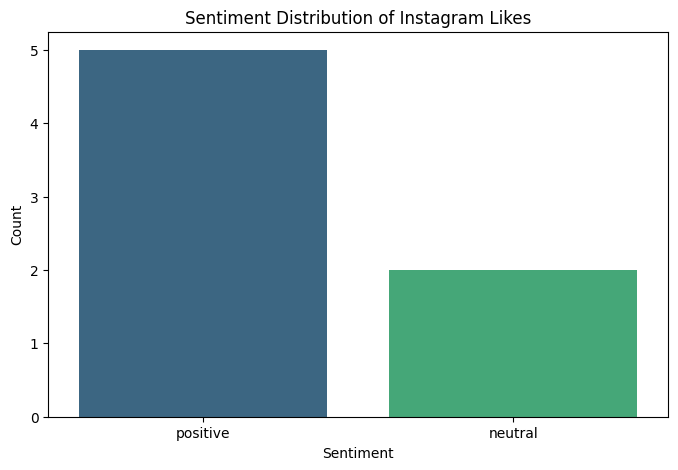

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of each sentiment type
sentiment_counts = data['sentiment'].value_counts()

# Create a bar plot for sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution of Instagram Likes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

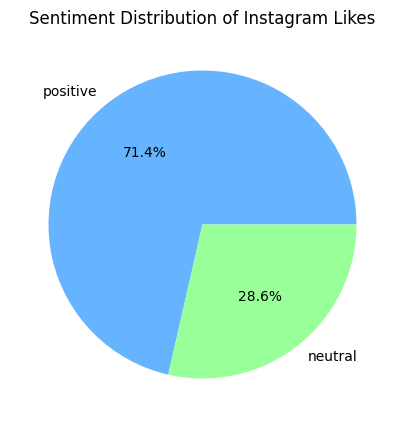

In [ ]:
sentiment_counts = data['sentiment'].value_counts()

# Create a pie chart for sentiment distribution
plt.figure(figsize=(8, 5))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Sentiment Distribution of Instagram Likes')
plt.show()

## Insights :
* Positive Likes are more and few negative Likes
* 71% positive Likes and 29% negative